In [4]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
import math
import folium
from plotly.subplots import make_subplots
from scipy.stats import linregress
from itertools import product
from copy import copy
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv(r"C:\Users\ateso\Desktop\CO2 files\world-data-2023.csv")
df = pd.DataFrame(data)
df

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
1        Albania              105           AL                43.10%   
2        Algeria               18           DZ                17.40%   
3        Andorra              164           AD                40.00%   
4         Angola               26           AO                47.50%   
..           ...              ...          ...                   ...   
190    Venezuela               32           VE                24.50%   
191      Vietnam              314           VN                39.30%   
192        Yemen               56           YE                44.60%   
193       Zambia               25           ZM                32.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000       32.49          93.0   
1           28,748             9,000       11.78         355.0   
2        2,381,741           317,000       24.28         213.0   
3              468               NaN        7.20         376.0   
4        1,246,700           117,000       40.73         244.0   
..             ...               ...         ...           ...   
190        912,050           343,000       17.88          58.0   
191        331,210           522,000       16.75          84.0   
192        527,968            40,000       30.45         967.0   
193        752,618            16,000       36.19         260.0   
194        390,757            51,000       30.68         263.0   

    Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0                Kabul         8,672  ...                           78.40%   
1               Tirana         4,536  ...                           56.90%   
2              Algiers       150,006  ...                           28.10%   
3     Andorra la Vella           469  ...                           36.40%   
4               Luanda        34,693  ...                           33.40%   
..                 ...           ...  ...                              ...   
190            Caracas       164,175  ...                           45.80%   
191              Hanoi       192,668  ...                           43.50%   
192              Sanaa        10,609  ...                           81.00%   
193             Lusaka         5,141  ...                           27.50%   
194             Harare        10,983  ...                           25.80%   

    Physicians per thousand  Population  \
0                      0.28  38,041,754   
1                      1.20   2,854,191   
2                      1.72  43,053,054   
3                      3.33      77,142   
4                      0.21  31,825,295   
..                      ...         ...   
190                    1.92  28,515,829   
191                    0.82  96,462,106   
192                    0.31  29,161,922   
193                    1.19  17,861,030   
194                    0.21  14,645,468   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                       48.90%           9.30%         71.40%   
1                                       55.70%          18.60%         36.60%   
2                                       41.20%          37.20%         66.10%   
3                                          NaN             NaN            NaN   
4                                       77.50%           9.20%         49.10%   
..                                         ...             ...            ...   
190                                     59.70%             NaN         73.30%   
191                                     77.40%          19.10%         37.60%   
192                                     38.00%             NaN         26.60%   
193                                     74.60%          16.20%         15.60%   
194   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [7]:
columns = data.columns
columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
df["Country"] = df["Country"].str.replace("S�����������", "Sao Tome and Principe")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [11]:
continent = pd.read_html(
    "https://statisticstimes.com/geography/countries-by-continents.php",
    match="Continent",
)[0]

continent = continent[["Country or Area", "Continent"]]

In [13]:
continent.info

<bound method DataFrame.info of                Country or Area Continent
0                  Afghanistan      Asia
1                Åland Islands    Europe
2                      Albania    Europe
3                      Algeria    Africa
4               American Samoa   Oceania
..                         ...       ...
244  Wallis and Futuna Islands   Oceania
245             Western Sahara    Africa
246                      Yemen      Asia
247                     Zambia    Africa
248                   Zimbabwe    Africa

[249 rows x 2 columns]>

In [14]:
df = pd.merge(df, Continent, left_on="Country", right_on="Country or Area", how="left")

df.loc[df["Continent"].isna(), "Country"]

11                        The Bahamas
20                            Bolivia
24                             Brunei
28                        Ivory Coast
29                         Cape Verde
39              Republic of the Congo
44                     Czech Republic
62                         The Gambia
73                       Vatican City
79                               Iran
81                Republic of Ireland
92                               Laos
111    Federated States of Micronesia
112                           Moldova
127                       North Korea
133    Palestinian National Authority
143                            Russia
162                       South Korea
170                             Syria
172                          Tanzania
174                        East Timor
185                    United Kingdom
186                     United States
190                         Venezuela
191                           Vietnam
Name: Country, dtype: object

In [15]:
contenint_fill = pd.DataFrame(
    {
        "The Bahamas": "North America",
        "Bolivia": "South America",
        "Brunei": "Asia",
        "Ivory Coast": "Africa",
        "Cape Verde": "Oceania",
        "Republic of the Congo": "Africa",
        "Czech Republic": "Europe",
        "The Gambia": "Africa",
        "Vatican City": "Europe",
        "Iran": "Asia",
        "Republic of Ireland": "Europe",
        "Laos": "Asia",
        "Federated States of Micronesia": "Oceania",
        "Moldova": "Europe",
        "North Korea": "Asia",
        "Palestinian National Authority": "Asia",
        "Russia": "Europe",
        "South Korea": "Asia",
        "Syria": "Asia",
        "Tanzania": "Africa",
        "East Timor": "Oceania",
        "United Kingdom": "Europe",
        "United States": "North America",
        "Venezuela": "South America",
        "Vietnam": "Asia",
    },
    index=["Country"]
)
contenint_fill = contenint_fill.melt(var_name="Country", value_name="Continent fill")

df = pd.merge(df, contenint_fill, on="Country", how='left')

df["Continent"] = df["Continent"].fillna(df["Continent fill"])

df = df.drop(columns=["Continent fill", "Country or Area"])

df["Continent"].value_counts(dropna=False)

Continent
Africa           53
Asia             47
Europe           44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

In [16]:
df_num = df.select_dtypes(include=[np.number])

df_cat = df.select_dtypes(include =[object])

df_num.head().T

0           1           2           3  \
Birth Rate                 32.490000   11.780000   24.280000    7.200000   
Calling Code               93.000000  355.000000  213.000000  376.000000   
Fertility Rate              4.470000    1.620000    3.020000    1.270000   
Infant mortality           47.900000    7.800000   20.100000    2.700000   
Life expectancy            64.500000   78.500000   76.700000         NaN   
Maternal mortality ratio  638.000000   15.000000  112.000000         NaN   
Physicians per thousand     0.280000    1.200000    1.720000    3.330000   
Latitude                   33.939110   41.153332   28.033886   42.506285   
Longitude                  67.709953   20.168331    1.659626    1.521801   

                                   4  
Birth Rate                 40.730000  
Calling Code              244.000000  
Fertility Rate              5.520000  
Infant mortality           51.600000  
Life expectancy            60.800000  
Maternal mortality ratio  241.000000  
Physicians per thousand     0.210000  
Latitude                  -11.202692  
Longitude                  17.873887

In [17]:
df_cat.describe().T

count unique               top freq
Country                                     195    195       Afghanistan    1
Density\n(P/Km2)                            195    137                25    7
Abbreviation                                188    188                AF    1
Agricultural Land( %)                       188    168            17.40%    3
Land Area(Km2)                              194    194           652,230    1
Armed Forces size                           171    105             2,000    7
Capital/Major City                          192    192             Kabul    1
Co2-Emissions                               188    184               143    2
CPI                                         178    175            110.62    2
CPI Change (%)                              179     86             2.80%    7
Currency-Code                               180    133               EUR   23
Forested Area (%)                           188    161            43.10%    3
Gasoline Price                              175    101            $0.71     6
GDP                                         193    193  $19,101,353,833     1
Gross primary education enrollment (%)      188    141           104.00%    4
Gross tertiary education enrollment (%)     183    171            10.20%    3
Largest city                                189    188             S����    2
Minimum wage                                150    114            $0.41     3
Official language                           190     76           English   31
Out of pocket health expenditure            188    160            40.50%    3
Population                                  194    194        38,041,754    1
Population: Labor force participation (%)   176    145            68.80%    3
Tax revenue (%)                             169    119            19.50%    4
Total tax rate                              183    156            36.60%    4
Unemployment rate                           176    164             4.59%    3
Urban_population                            190    190         9,797,273    1
Continent                                   195      6            Africa   53

In [19]:
transform = [ 'Agricultural Land( %)',  'Armed Forces size','Land Area(Km2)','Density\n(P/Km2)', 
'Forested Area (%)', 'Co2-Emissions','CPI', 'CPI Change (%)', 'Gasoline Price', 'GDP',
'Gross primary education enrollment (%)','Gross tertiary education enrollment (%)', 
'Minimum wage', 'Out of pocket health expenditure', 'Urban_population','Population: Labor force participation (%)',
'Population' ,'Tax revenue (%)', 'Unemployment rate','Total tax rate']

df[transform] = df[transform].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))
warnings.filterwarnings('ignore')

In [48]:
df['Capital/Major City']

0                 Kabul
1                Tirana
2               Algiers
3      Andorra la Vella
4                Luanda
             ...       
190             Caracas
191               Hanoi
192               Sanaa
193              Lusaka
194              Harare
Name: Capital/Major City, Length: 195, dtype: object

In [55]:
capital_city_column = df[["Capital/Major City","Country"]]

capital_city_column.to_csv('City.csv', index=False, header=['Capital/Major City', 'Country'])

In [53]:
corrections = {
    'Bras���': 'Brasilia',
    'Yaound�': 'Yaounde',
    'Bogot�': 'Bogota',
    'San Jos������': 'San Jose',
    'Reykjav��': 'Reykjavik',
    'Mal�': 'Male',
    'Chi����': 'Chisinau',
    'Asunci��': 'Asuncion',
    'S����': 'Sao Tome',
    'Lom�': 'Lome',
    'Nuku����': 'Nukualofa'
}

df['Capital/Major City'] = df['Capital/Major City'].replace(corrections, regex=True)

In [54]:
df

Country  Density\n(P/Km2) Abbreviation  Agricultural Land( %)  \
0    Afghanistan              60.0           AF                   58.1   
1        Albania             105.0           AL                   43.1   
2        Algeria              18.0           DZ                   17.4   
3        Andorra             164.0           AD                   40.0   
4         Angola              26.0           AO                   47.5   
..           ...               ...          ...                    ...   
190    Venezuela              32.0           VE                   24.5   
191      Vietnam             314.0           VN                   39.3   
192        Yemen              56.0           YE                   44.6   
193       Zambia              25.0           ZM                   32.1   
194     Zimbabwe              38.0           ZW                   41.9   

     Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
0          652230.0           323000.0       32.49          93.0   
1           28748.0             9000.0       11.78         355.0   
2         2381741.0           317000.0       24.28         213.0   
3             468.0                NaN        7.20         376.0   
4         1246700.0           117000.0       40.73         244.0   
..              ...                ...         ...           ...   
190        912050.0           343000.0       17.88          58.0   
191        331210.0           522000.0       16.75          84.0   
192        527968.0            40000.0       30.45         967.0   
193        752618.0            16000.0       36.19         260.0   
194        390757.0            51000.0       30.68         263.0   

    Capital/Major City  Co2-Emissions  ...      Continent  \
0                Kabul         8672.0  ...           Asia   
1               Tirana         4536.0  ...         Europe   
2              Algiers       150006.0  ...         Africa   
3     Andorra la Vella          469.0  ...         Europe   
4               Luanda        34693.0  ...         Africa   
..                 ...            ...  ...            ...   
190            Caracas       164175.0  ...  South America   
191              Hanoi       192668.0  ...           Asia   
192              Sanaa        10609.0  ...           Asia   
193             Lusaka         5141.0  ...         Africa   
194             Harare        10983.0  ...         Africa   

     Urban Population percentage GDP rank  Continent GDP  \
0                       0.257540    114.0   3.763164e+13   
1                       0.612290    123.0   2.159370e+13   
2                       0.731890     55.0   2.440717e+12   
3                       0.879845    162.0   2.159370e+13   
4                       0.661770     65.0   2.440717e+12   
..                           ...      ...            ...   
190                     0.882400     25.0   3.855538e+12   
191                     0.366280     45.0   3.763164e+13   
192                     0.372730    104.0   3.763164e+13   
193                     0.440720    111.0   2.440717e+12   
194                     0.322100    112.0   2.440717e+12   

     Contribution to the Continent GDP  GDP per Population  \
0                                 0.00          502.115487   
1                                 0.00         5352.857411   
2                                 0.07         3948.343279   
3                                 0.00        40886.391162   
4                                 0.04         2973.591160   
..                                 ...                 ...   
190                               0.13        16915.493453   
191                               0.01         2715.276036   
192                               0.00          922.929642   
193                               0.01         1291.343357   
194                               0.01         1463.985910   

     Co2-Emissions per Population  Post Tax Minimum wage  GDP_per_capita  \
0                        0.0

In [21]:
df_num

Birth Rate  Calling Code  Fertility Rate  Infant mortality  \
0         32.49          93.0            4.47              47.9   
1         11.78         355.0            1.62               7.8   
2         24.28         213.0            3.02              20.1   
3          7.20         376.0            1.27               2.7   
4         40.73         244.0            5.52              51.6   
..          ...           ...             ...               ...   
190       17.88          58.0            2.27              21.4   
191       16.75          84.0            2.05              16.5   
192       30.45         967.0            3.79              42.9   
193       36.19         260.0            4.63              40.4   
194       30.68         263.0            3.62              33.9   

     Life expectancy  Maternal mortality ratio  Physicians per thousand  \
0               64.5                     638.0                     0.28   
1               78.5                      15.0                     1.20   
2               76.7                     112.0                     1.72   
3                NaN                       NaN                     3.33   
4               60.8                     241.0                     0.21   
..               ...                       ...                      ...   
190             72.1                     125.0                     1.92   
191             75.3                      43.0                     0.82   
192             66.1                     164.0                     0.31   
193             63.5                     213.0                     1.19   
194             61.2                     458.0                     0.21   

      Latitude   Longitude  
0    33.939110   67.709953  
1    41.153332   20.168331  
2    28.033886    1.659626  
3    42.506285    1.521801  
4   -11.202692   17.873887  
..         ...         ...  
190   6.423750  -66.589730  
191  14.058324  108.277199  
192  15.552727   48.516388  
193 -13.133897   27.849332  
194 -19.015438   29.154857  

[195 rows x 9 columns]

In [22]:
df["Urban Population percentage"] = df["Urban_population"] / df["Population"]

df["GDP rank"] = df["GDP"].rank(ascending=False)

df["Continent GDP"] = df.groupby("Continent")["GDP"].transform("sum")

df["Contribution to the Continent GDP"] = (df["GDP"] / df["Continent GDP"]).round(2)

df["GDP per Population"] = df["GDP"] / df["Population"]

df["Co2-Emissions per Population"] = df["Co2-Emissions"] / df["Population"]

df["Post Tax Minimum wage"] = df["Minimum wage"] * (1 - df["Total tax rate"])

df["GDP_per_capita"]=df["GDP"]/df["Population"]


In [23]:
df.head()

Country  Density\n(P/Km2) Abbreviation  Agricultural Land( %)  \
0  Afghanistan              60.0           AF                   58.1   
1      Albania             105.0           AL                   43.1   
2      Algeria              18.0           DZ                   17.4   
3      Andorra             164.0           AD                   40.0   
4       Angola              26.0           AO                   47.5   

   Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
0        652230.0           323000.0       32.49          93.0   
1         28748.0             9000.0       11.78         355.0   
2       2381741.0           317000.0       24.28         213.0   
3           468.0                NaN        7.20         376.0   
4       1246700.0           117000.0       40.73         244.0   

  Capital/Major City  Co2-Emissions  ...  Longitude  Continent  \
0              Kabul         8672.0  ...  67.709953       Asia   
1             Tirana         4536.0  ...  20.168331     Europe   
2            Algiers       150006.0  ...   1.659626     Africa   
3   Andorra la Vella          469.0  ...   1.521801     Europe   
4             Luanda        34693.0  ...  17.873887     Africa   

  Urban Population percentage  GDP rank  Continent GDP  \
0                    0.257540     114.0   3.763164e+13   
1                    0.612290     123.0   2.159370e+13   
2                    0.731890      55.0   2.440717e+12   
3                    0.879845     162.0   2.159370e+13   
4                    0.661770      65.0   2.440717e+12   

   Contribution to the Continent GDP  GDP per Population  \
0                               0.00          502.115487   
1                               0.00         5352.857411   
2                               0.07         3948.343279   
3                               0.00        40886.391162   
4                               0.04         2973.591160   

   Co2-Emissions per Population  Post Tax Minimum wage  GDP_per_capita  
0                      0.000228                -30.272      502.115487  
1                      0.001589                -39.872     5352.857411  
2                      0.003484                -61.845     3948.343279  
3                      0.006080                    NaN    40886.391162  
4                      0.001090                -34.151     2973.591160  

[5 rows x 44 columns]

In [25]:
csv_file_path = r"C:\Users\ateso\Desktop\CO2 files\Cleaned_data\Trasnformed_data.csv"

df.to_csv(csv_file_path, index=False)



In [26]:
df[transform] = df[transform].apply(pd.to_numeric)
fig = px.imshow(df[transform+["GDP_per_capita"]].corr(),color_continuous_scale="teal")
fig.update_layout(height=1000)
fig.show()

In [27]:
corr_matrix = df.drop(columns=["Calling Code", "Latitude", "Longitude"]).corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        z=corr_matrix,
        x=corr_matrix.index,
        y=corr_matrix.columns,
        hoverongaps=False,
        colorscale ="earth",))
fig.update_layout(
    width=1000,
    height=1000,)
fig.show()

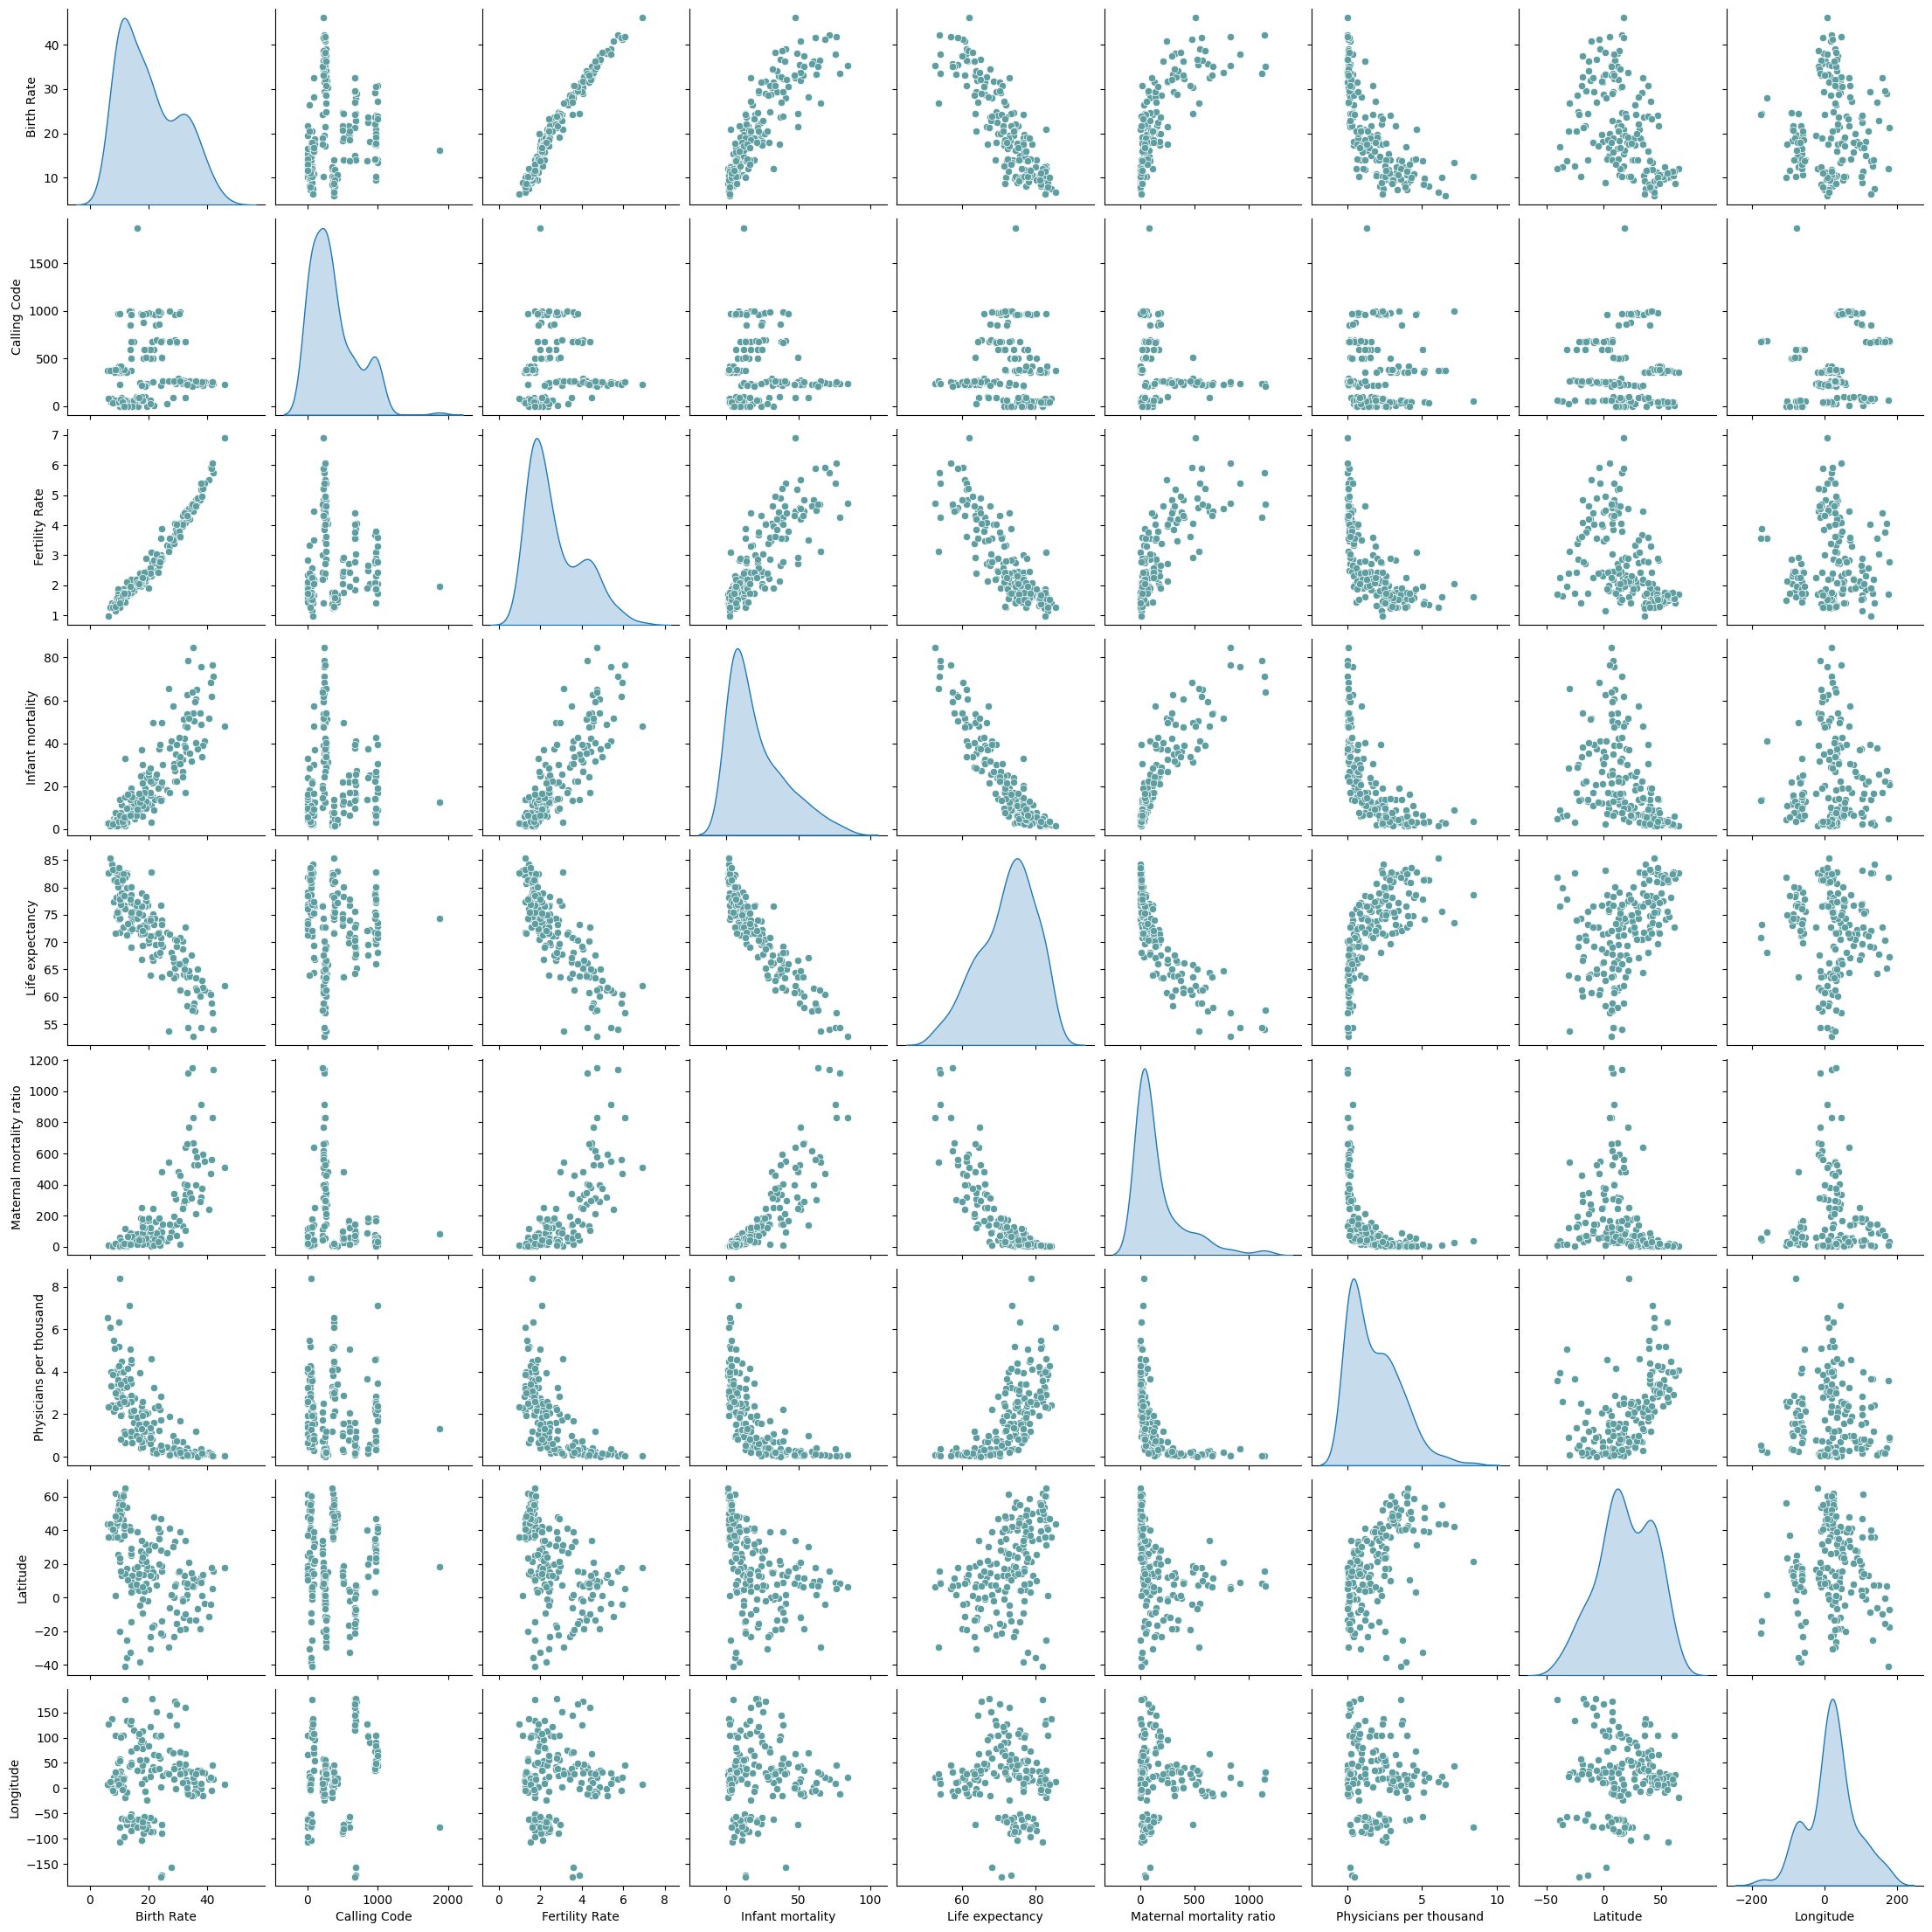

In [28]:
sns.pairplot(df_num, diag_kind='kde',plot_kws={'color':'cadetblue'})
plt.show()

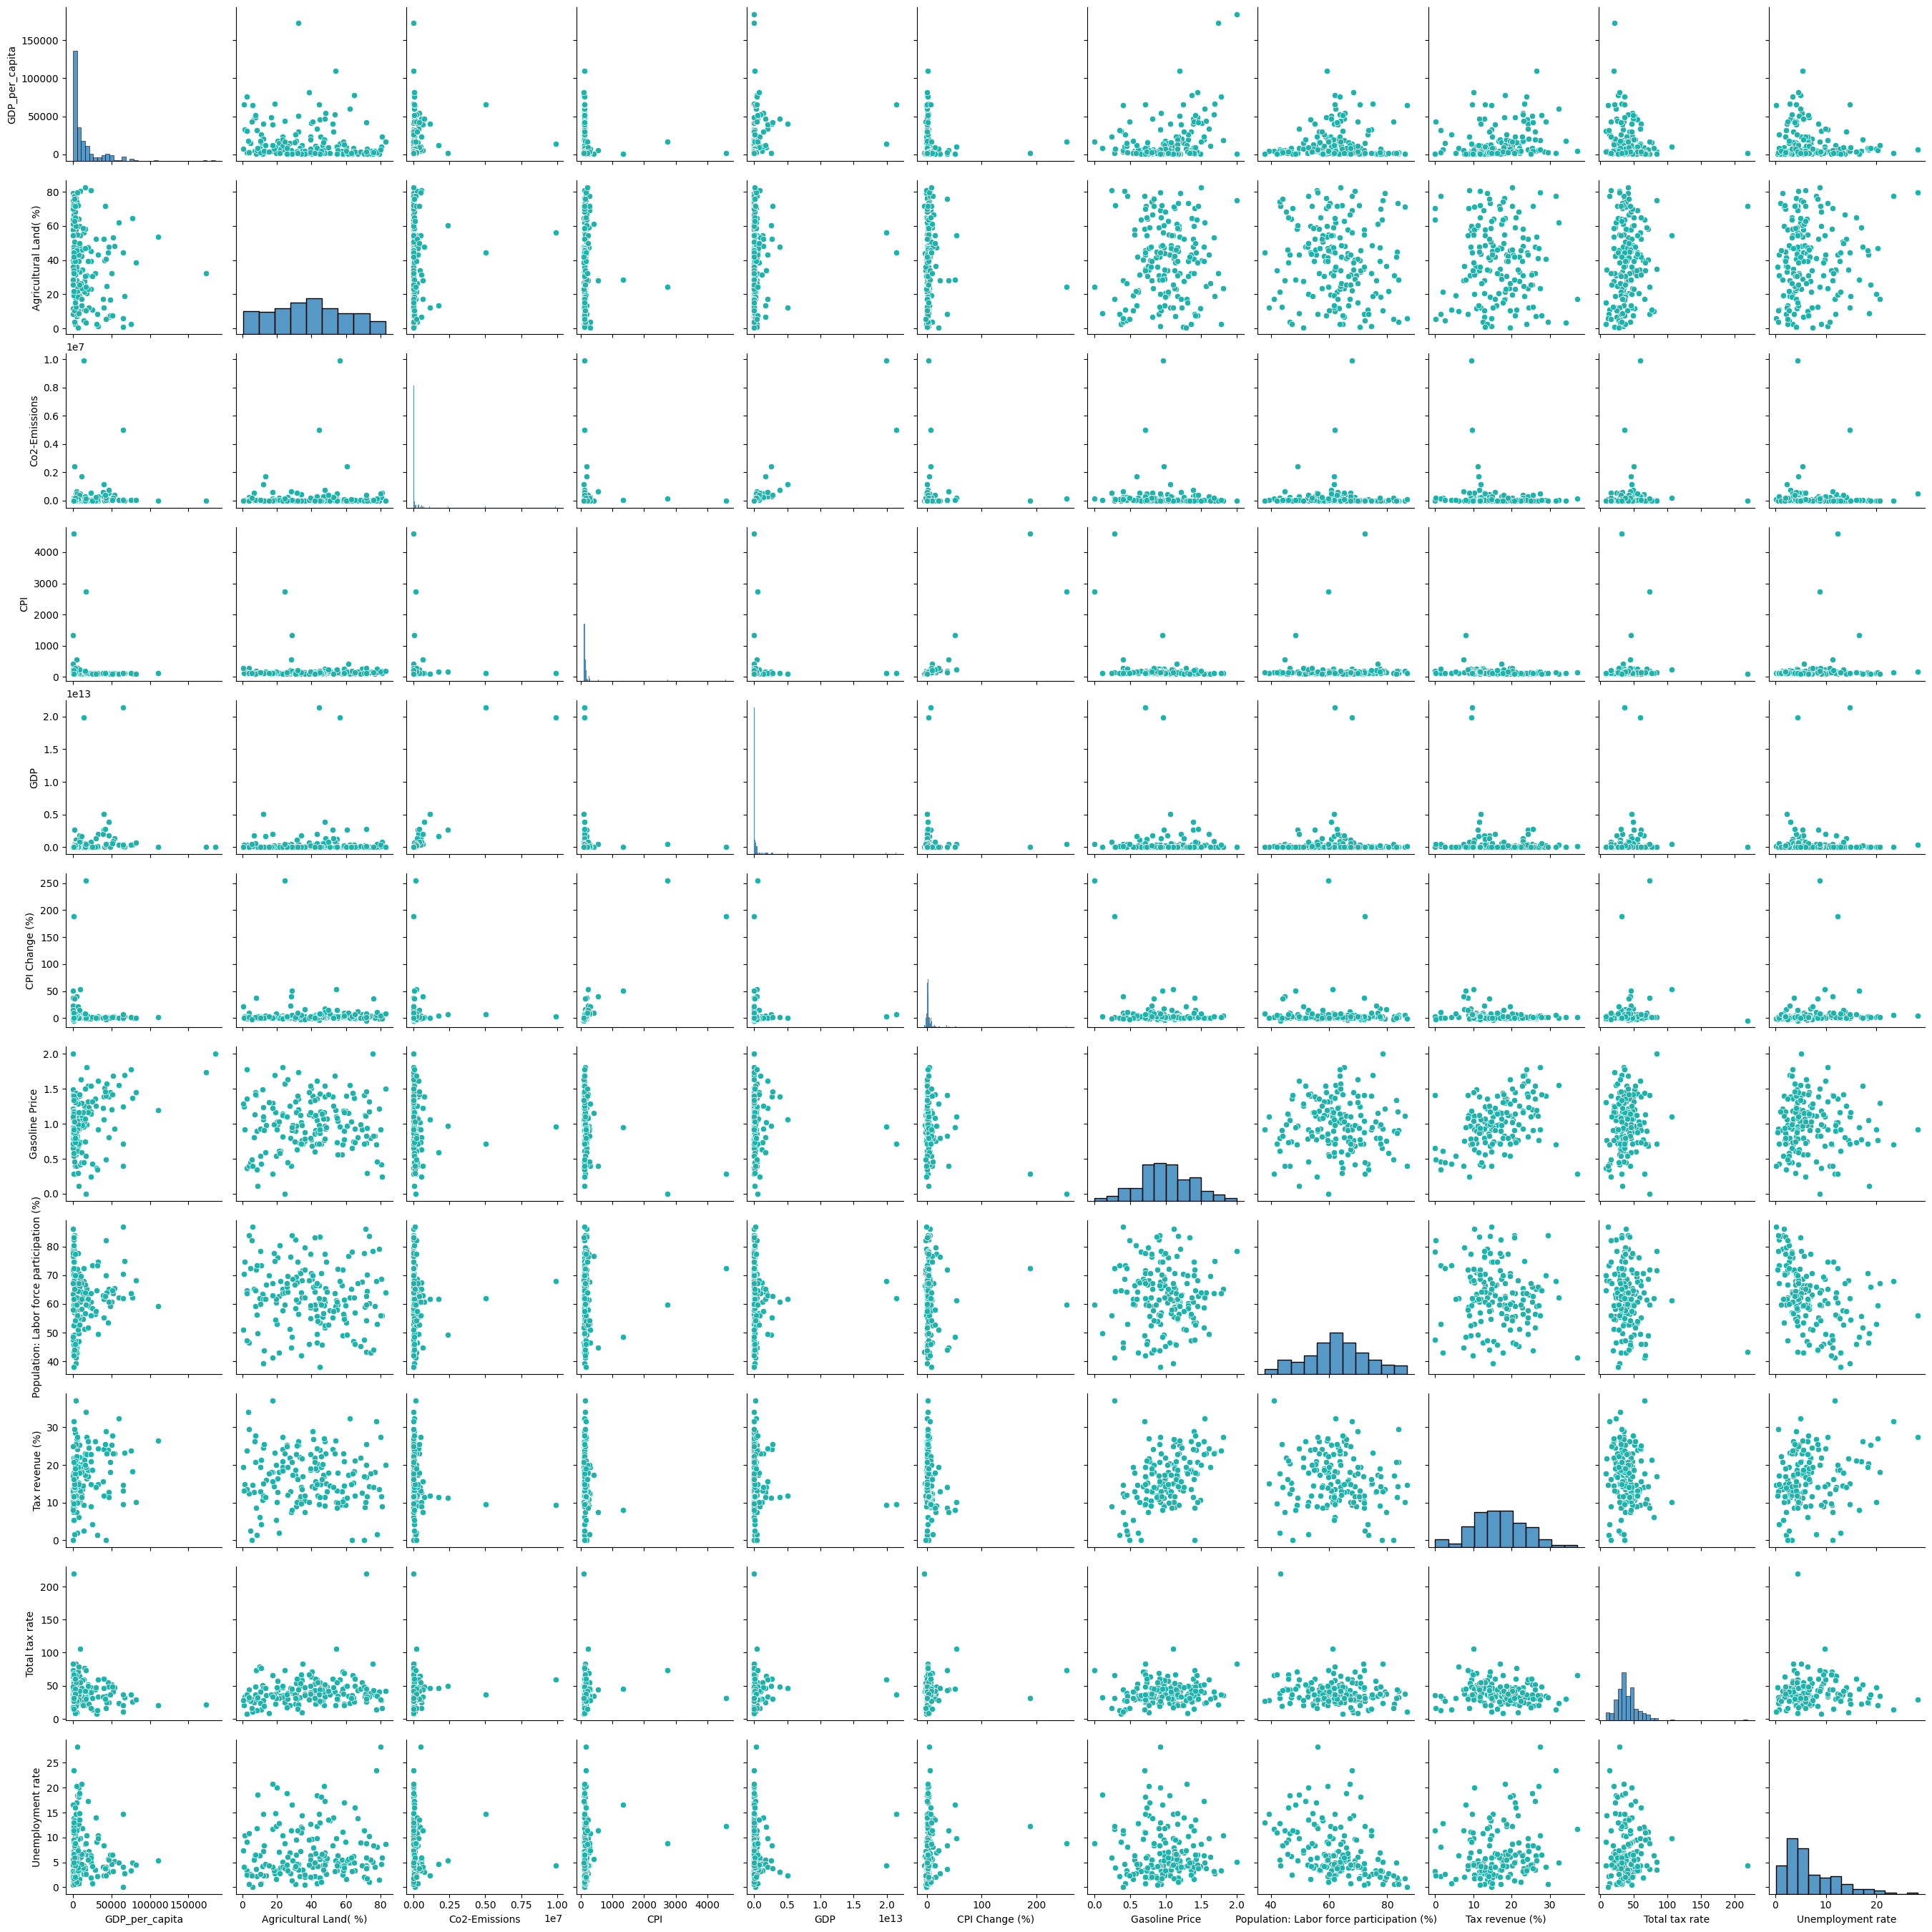

In [29]:
df["urban_pop/total_pop"] = df["Urban_population"]/df["Population"]
eco_features = ['GDP_per_capita','Agricultural Land( %)','Co2-Emissions','CPI','GDP','CPI Change (%)','Gasoline Price','Population: Labor force participation (%)','Tax revenue (%)','Total tax rate','Unemployment rate']
sns.pairplot(df[eco_features],plot_kws={'color':'lightseagreen'})

In [30]:
import plotly.express as px
import plotly.io as pio
fig2 = px.scatter(df, x='GDP rank', y='GDP', color='Country', title='GDP rank & Score differentiated by Country',template = 'plotly_white')
fig2.show()

In [35]:
plt = px.scatter(df, x="Agricultural Land( %)", y="Co2-Emissions per Population",size="Population", color ="Continent",size_max=150,color_continuous_scale="Tealgrn",hover_data=df[['Country']],template = 'plotly_white')
plt.show()

In [34]:
df['Population'].fillna(0, inplace=True)

plt = px.scatter(df, x="Armed Forces size", y="Fertility Rate", size="Population", color="Continent", size_max=80, color_continuous_scale="Tealgrn", hover_data=df[['Country']], template='plotly_white')
plt.show()



In [45]:
plt = px.scatter(df, x="Maternal mortality ratio", y="Physicians per thousand",size="Population",color = "Infant mortality", log_x="True",size_max=150,
                 trendline="ols" ,trendline_options=dict(log_x=True),color_continuous_scale="dense",trendline_color_override="thistle",hover_data=df[['Country']],template = 'simple_white')
plt.show()

In [43]:
plt = px.scatter(df, x="Infant mortality", y="Birth Rate",size="Population", color ="Life expectancy", log_x="True",size_max=150,
                 trendline="ols" ,trendline_options=dict(log_x=True),color_continuous_scale="dense",trendline_color_override="thistle",hover_data=df[['Country']],template = 'plotly_white')
plt.show()

In [44]:
plt = px.scatter(df, x="Minimum wage", y="Birth Rate",size="Population", color ="Life expectancy", log_x="True",size_max=150,
                 trendline="ols" ,trendline_options=dict(log_x=True),color_continuous_scale="dense",trendline_color_override="thistle",hover_data=df[['Country']],template = 'plotly_white')
plt.show()